Orlando Osberto Cabrera Mejía #19943  
Pablo Alejandro Méndez Morales #19195

# Laboratorio #1 - Detección de Phishing

In [2]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
%matplotlib inline

## Parte 1 - Ingeniería de Datos

### Exploración de Datos

**1. Cargue el dataset en un dataframe de pandas, muestre un ejemplo de cinco observaciones.**

In [5]:
df = pd.read_csv("/data/workspace_files/lab1/dataset_pishing.csv")
#df = pd.read_csv("./dataset_pishing.csv")
df.head(5)

,url,ip,nb_www,nb_com,nb_dslash,http_in_path,punycode,port,tld_in_path,tld_in_subdomain,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,0,1,0,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,1,0,0,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,1,0,1,0,0,0,0,0,1,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,0,0,0,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,0,1,0,0,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


**2. Muestre la cantidad de observaciones etiquetadas en la columna status como "legit" y como "phishing". ¿Está balanceado el dataset?**

In [6]:
df['status'].value_counts()

legitimate 5715
phishing 5715
Name: status, dtype: int64

El *dataset* está balanceado. Existe la misma cantidad de observaciones con estado *legit* que con estado *phishing*.

### Derivación de características

En base al artículo “Towards Benchmark Datasets for ML Based Wensite Phishing Detection: An Experimental Study”, derivar las características basadas en el dominio: f1, f2, f4 – f20, f25, f26 y f27.  

Para ello escriba las funciones necesarias y genere las nuevas columnas del dataset. Muestre un nuevo ejemplo de cinco observaciones donde se visualicen algunas de las columnas nuevas.

In [7]:
specialCharacters={
    "f4":"-",
    "f5":"@",
    "f6":"?",
    "f7":"&",
    "f8":"|",
    "f9":"=",
    "f10":" _",
    "f11":" ˜",
    "f12":" %",
    "f13":" /",
    "f14":" *",
    "f15":" :",
    "f16":" ,",
    "f17":" ;",
    "f18":" $",
    "f19":" %",
    "f20":" ",
    }

In [8]:
def countSpecialCharacters(data):
    for key in specialCharacters:
        data[key] = data["url"].apply(lambda x: x.count(specialCharacters[key]))

In [9]:
characteristics = ["url","f1","f2","f3","f4","f5","f6","f7","f8","f9","f10","f11","f12","f13","f14","f15","f16","f17","f18","f19","f20","f25","f26","f27"]

In [10]:
# Longitud de la url
df["f1"] = df["url"].apply(lambda x: len(x.split("//")[1])) # URL completa
df["f2"] = df["url"].apply(lambda x: len(x.split("//")[1].split("/")[0])) # Dominio
# Si la dirección es un dominio o es la dirección IP
df["f3"] = df["url"].apply(lambda x: 1 if x.split("//")[1].split("/")[0].split(".")[0].isdigit() else 0)
# Cantidad de caracteres especiales
countSpecialCharacters(df)
# Posee token https
df["f25"] = df["url"].apply(lambda x: 1 if re.search("^https",x) else 0)
# Cuenta la cantidad de números en la url
df["f26"] = df["url"].apply(lambda x: len(re.findall("\d",x.split("//")[1]))) # URL completa
df["f27"] = df["url"].apply(lambda x: len(re.findall("\d",x.split("//")[1].split("/")[0]))) # Dominio
display(df[characteristics].head(5))

,url,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f14,f15,f16,f17,f18,f19,f20,f25,f26,f27
0,http://www.crestonwood.com/router.php,30,19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,http://shadetreetechnology.com/V4/validation/a...,70,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,17,0
2,https://support-appleld.com.secureupdate.duila...,118,50,0,1,0,1,2,0,3,...,0,0,0,0,0,0,0,1,19,0
3,http://rgipt.ac.in,11,11,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,http://www.iracing.com/tracks/gateway-motorspo...,48,15,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Preprocesamiento

Realice las modificaciones necesarias para convertir la variable categórica status a una variable binaria. Elimine la columna del dominio.

In [11]:
df.loc[df.status == 'legitimate', 'status'] = 0.0
df.loc[df.status == 'phishing', 'status'] = 1.0
df["status"] = (pd.to_numeric(df['status'], errors='coerce')) # Asegurando que el tipo de dato sea numerico
df.drop(columns=["url"], inplace=True) # Eliminando la columna url

In [12]:
df.head(5)

,ip,nb_www,nb_com,nb_dslash,http_in_path,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,...,f14,f15,f16,f17,f18,f19,f20,f25,f26,f27
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,17,0
2,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,19,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Visualización de resultados

Genere un reporte de perfil con la librería *pandas_profiling*. Analice el reporte y determine las columnas que son restantes, o que no tienen una varianza alta con la columna *status*. Almacene su reporte como una página html.

In [ ]:
prof = ProfileReport(df)

In [ ]:
prof.to_file(output_file='output.html')

Export report to file: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


In [13]:
corr = df.corr()
corr[corr.status.notna() == False].status

ratio_nullHyperlinks NaN
ratio_intRedirection NaN
ratio_intErrors NaN
submit_email NaN
sfh NaN
f8 NaN
f10 NaN
f11 NaN
f12 NaN
f13 NaN
f14 NaN
f15 NaN
f16 NaN
f17 NaN
f18 NaN
f19 NaN
Name: status, dtype: float64

Luego de analizar el reporte y de analizar la relación que tiene la variable status con las demás, se puede obtener que las siguientes variables no aportan valor a dicha variable. Las variables son:

ratio_nullHyperlinks \
ratio_intRedirection 
ratio_intErrors      
submit_email        
sfh                 
f8                  
f10                 
f11                 
f12                 
f13                 
f14                 
f15                 
f16                 
f17                 
f18                 
f19                               

Estas variables se puede eliminar al no aportar nada a la variable status.

In [14]:
# Codigo sacado de: https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
sol = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))
print(sol[sol > 0.7])

longest_words_raw    longest_word_path    0.968503
f7                   f9                   0.906404
longest_word_host    avg_word_host        0.816313
shortest_word_host   avg_word_host        0.800014
ratio_intHyperlinks  links_in_tags        0.799374
longest_word_path    avg_word_path        0.791198
f1                   f26                  0.787492
longest_words_raw    avg_words_raw        0.784753
f6                   f9                   0.731735
google_index         status               0.731171
avg_words_raw        avg_word_path        0.729817
longest_words_raw    avg_word_path        0.725344
length_words_raw     f1                   0.720165
longest_word_path    avg_words_raw        0.701914
dtype: float64


Otras variables que se pueden eliminar al contar con una correlación alta (arriba de 0.7) entre si son: \
longest_word_host\
shortest_word_host\
ratio_intHyperlinks\
f1\
f6\
avg_words_raw\
longest_words_raw\
longest_word_path


Nota: se tomaron en cuenta las variables que salieron en más de una vez

### Selección de Características

En base al análisis del reporte, elimine las características repetidas o irrelevantes para la clasificación de un sitio de *phishing*. Verifique que no posee observaciones repetidas.

In [16]:
col_to_delete = ["ratio_nullHyperlinks",
                "ratio_intRedirection",
                "ratio_intErrors",
                "submit_email",
                "sfh",
                "f8",
                "f10",
                "f11",
                "f12",
                "f13",
                "f14",
                "f15",
                "f16",
                "f17",
                "f18",
                "f19",
                "longest_word_host",
                "shortest_word_host",
                "ratio_intHyperlinks",
                "f1",
                "f6",
                "avg_words_raw",
                "longest_words_raw",
                "longest_word_path",
]

In [17]:
df.drop(col_to_delete, axis=1, inplace=True)

In [18]:
df.head(5)

,ip,nb_www,nb_com,nb_dslash,http_in_path,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,...,f2,f3,f4,f5,f7,f9,f20,f25,f26,f27
0,0,1,0,0,0,0,0,0,0,0,...,19,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,23,0,0,0,0,0,0,0,17,0
2,1,0,1,0,0,0,0,0,1,0,...,50,0,1,0,2,3,0,1,19,0
3,0,0,0,0,0,0,0,0,0,0,...,11,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,15,0,2,0,0,0,0,0,0,0


## Parte 2 - Implementación

### Separación de datos
- Datos de entrenamiento: 55%
- Datos de validación: 15%
- Datos de prueba: 30%
- Almacene cada datset como un archivo .csv

In [19]:
target = df['status']
feature_matrix = df.drop(['status'], axis=1)
print('Final features', feature_matrix.columns)
feature_matrix.head()

Final features Index(['ip', 'nb_www', 'nb_com', 'nb_dslash', 'http_in_path', 'punycode',
       'port', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain',
       'nb_subdomains', 'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_path', 'avg_word_host', 'avg_word_path', 'phish_hints',
       'domain_in_brand', 'brand_in_subdomain', 'brand_in_path',
       'suspecious_tld', 'statistical_report', 'nb_hyperlinks',
       'ratio_extHyperlinks', 'nb_extCSS', 'ratio_extRedirection',
       'ratio_extErrors', 'login_form', 'external_favicon', 'links_in_tags',
       'ratio_intMedia', 'ratio_extMedia', 'iframe', 'popup_window',
       'safe_anchor', 'onmouseover', 'right_clic', 'empty_title',
       'domain_in_title', 'domain_with_copyright', 'whois_registered_domain',
       'domain_registration_length', 'domain_age', 'web_traff

,ip,nb_www,nb_com,nb_dslash,http_in_path,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,...,f2,f3,f4,f5,f7,f9,f20,f25,f26,f27
0,0,1,0,0,0,0,0,0,0,0,...,19,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,23,0,0,0,0,0,0,0,17,0
2,1,0,1,0,0,0,0,0,1,0,...,50,0,1,0,2,3,0,1,19,0
3,0,0,0,0,0,0,0,0,0,0,...,11,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,15,0,2,0,0,0,0,0,0,0


In [20]:
x_train, x_test, \
    y_train, y_test = train_test_split(feature_matrix, target, test_size=0.3, random_state=42)

x_validation, x_train, \
    y_validation, y_train = train_test_split(x_train, y_train, test_size=0.7857, random_state=42)

In [21]:
print("Train: ", x_train.shape)
print("Validation: ", x_validation.shape, )
print("Test: ", x_test.shape, )
print("Total: ", df.shape, )

Train:  (6287, 64)
Validation:  (1714, 64)
Test:  (3429, 64)
Total:  (11430, 65)


### Implementación

Utilice dos algoritmos de Machine Learning para entrenar el modelo. Muestre y explique los valores obtenidos de las siguientes métricas para los datos de validación y pruebas, para cada modelo, en base al contexto del problema (detección de Phishing).

- Matriz de confusión
- Precisión
- Recall
- F1 Score

In [22]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=500, random_state=42, verbose=True)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_validation)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [23]:
print("Accuracy: ", accuracy_score(y_validation, y_pred))

Accuracy:  0.9620770128354725


In [39]:
ax = sns.heatmap(
    confusion_matrix(y_validation, y_pred), 
    annot=True, 
    fmt="d", 
    yticklabels=["Legítimo", "Phishing"], 
    xticklabels=["Legítimo", "Phishing"],
)
ax.set(xlabel="Predicción", ylabel="Verdadero Valor")
plt.show()

El modelo de *Random Forest* clasificó correctamente 832 sitios de *phishing* como sitios de *phishing* y 817 sitios legítimos. 

Sin embargo el modelo catalogó erróneamente 30 sitios legítimos como *phishing* y a 35 sitios de *phishing* como sitios legítimos.

In [41]:
print(classification_report(y_validation, y_pred, target_names=["phishing", "legitimate"]))

              precision    recall  f1-score   support

    phishing       0.96      0.96      0.96       847
  legitimate       0.97      0.96      0.96       867

    accuracy                           0.96      1714
   macro avg       0.96      0.96      0.96      1714
weighted avg       0.96      0.96      0.96      1714



In [42]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=500,random_state=42)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_validation)

In [43]:
print("Accuracy: ", accuracy_score(y_validation, y_pred))

Accuracy:  0.9299883313885647


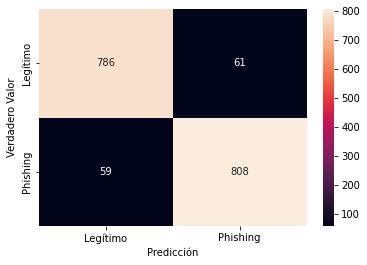

In [44]:
ax = sns.heatmap(
    confusion_matrix(y_validation, y_pred), 
    annot=True, 
    fmt="d", 
    yticklabels=["Legítimo", "Phishing"], 
    xticklabels=["Legítimo", "Phishing"],
)
ax.set(xlabel="Predicción", ylabel="Verdadero Valor")
plt.show()

El modelo de *Decision Tree* clasificó correctamente 808 sitios de *phishing* como sitios de *phishing* y a 786 sitios legítimos. 

Sin embargo el modelo catalogó erróneamente 61 sitios legítimos como *phishing* y a 59 sitios de *phishing* como sitios legítimos.

In [ ]:
print("Classification Report: ", classification_report(y_validation, y_pred, target_names=["phishing", "legitimate"]))

Classification Report:                precision    recall  f1-score   support

    phishing       0.93      0.93      0.93       867
  legitimate       0.93      0.93      0.93       847

    accuracy                           0.93      1714
   macro avg       0.93      0.93      0.93      1714
weighted avg       0.93      0.93      0.93      1714



### Discusión

**1. ¿Cuál es el impacto de clasificar un sitio legítimo como Phishing?**

Clasificar un sitio legítimo como Phishing puede reducir el tráfico hacia dichos sitios. Dependiendo del modelo de negocios del sitio, puede reducir sus ingresos equivocadamente. 

**2. ¿Cuál es el impacto de clasificar un sitio de Phishing como legítimo?**

Clasifica un sitio de Phishing como legítimo puede causar que el agente malicioso obtenga información importante del usuario. En sitios financieros, puede tener fuertes repercusiones económicas.

**3. En base a las respuestas anteriores, ¿Qué métrica elegiría para comparar modelos similares de clasificación de phishing?**
Tomando en cuenta que nuestro modelo detecta sitios de *pishing*, tiene sentido pensar que las personas que serán beneficiadas por nuestro modelo, serán usuarios regulares. Con esa consideración, detectar un sitio legítimo como *phishing* no va a tener fuertes repercusiones en el usuario. Pero, detectar un sitio de *phishing* como legítimo, podría tener fuertes repercusiones para el usuario.

De manera qué es mejor usar la métrica de *recall*.

**4. ¿Qué modelo es mejor para la clasificación de Phishing? Justifique**  
Independientemente de qué categoría es escogida para comparar modelos (*precision*, *f1-score* o *recall*), el modelo de Random Forest tiene un mejor desempeño. De manera que, el primer modelo es mejor para la clasificación de *phishing*.

**5. En base a las métricas obtenidas, ¿es necesaria la intervención de una persona humana para tomar la decisión final?**  
Siempre será necesaria la intervención de una persona humana para tomar una decisión final. Aún con nuestro mejor modelo, la predicción es de 96%, significa que un 4% de los sitios que el modelo detecten como *phishing* no serán *phishing*. También es necesario considerar que el ambiente web es muy volátil, cambia muy rápidamente. De manera que aunque nuestro modelo funcione ahora, no quiere decir que va a funcionar igual de bien en los próximos años. Igualmente, es posible que los sitios de *phishing* evolucionen para engañar a nuestro modelo predictivo. Por lo que, recomendamos la intervención humana.